In [79]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
from scipy.stats import ttest_ind,sem
import pandas as pd
import matplotlib
import climapy.climapy.climapy_stats as clps

In [80]:
dirctl='/dhobyghaut/grandey/data5/cesm/s2s/'
pptcu2k=xr.open_dataset(dirctl+'p17d_b_2000/atm/p17d_b_2000.cam.h0.PRECC.nc')
pptcl2k=xr.open_dataset(dirctl+'p17d_b_2000/atm/p17d_b_2000.cam.h0.PRECL.nc')
# print(pptcu2k)
pptcueas0=xr.open_dataset(dirctl+'p17d_b_eas0c/atm/p17d_b_eas0c.cam.h0.PRECC.nc')
pptcleas0=xr.open_dataset(dirctl+'p17d_b_eas0c/atm/p17d_b_eas0c.cam.h0.PRECL.nc')

u_2k=xr.open_dataset(dirctl+'p17d_b_2000/atm/p17d_b_2000.cam.h0.U.nc')
v_2k=xr.open_dataset(dirctl+'p17d_b_2000/atm/p17d_b_2000.cam.h0.V.nc')
u_eas0=xr.open_dataset(dirctl+'p17d_b_eas0c/atm/p17d_b_eas0c.cam.h0.U.nc')
v_eas0=xr.open_dataset(dirctl+'p17d_b_eas0c/atm/p17d_b_eas0c.cam.h0.V.nc')

# wind=xr.open_dataset(dirctl+'p17d_b_eas0/atm/')
#ppt data is in m/s. convert to mm/day *60*60*24*1000 = *86400000
units=60*60*24*1000
#d01
latmin=2.92
latmax=24.18
lonmin=81.9 #80.66
lonmax=124.17 #125.42
#d02
# latmin=6.74
# latmax=20.40
# lonmin=95.74
# lonmax=110.08
starttime=12*50
#comment out this section below if you want global data
pptcl2k=pptcl2k.sel(lat=slice(latmin, latmax),lon=slice(lonmin,lonmax))
pptcu2k=pptcu2k.sel(lat=slice(latmin, latmax),lon=slice(lonmin,lonmax))
pptcleas0=pptcleas0.sel(lat=slice(latmin, latmax),lon=slice(lonmin,lonmax))
pptcueas0=pptcueas0.sel(lat=slice(latmin, latmax),lon=slice(lonmin,lonmax))
u_2k=u_2k.sel(lat=slice(latmin, latmax),lon=slice(lonmin,lonmax))
v_2k=v_2k.sel(lat=slice(latmin, latmax),lon=slice(lonmin,lonmax))
u_eas0=u_eas0.sel(lat=slice(latmin, latmax),lon=slice(lonmin,lonmax))
v_eas0=v_eas0.sel(lat=slice(latmin, latmax),lon=slice(lonmin,lonmax))
#comment out section above if you want global data
t,nlat,nlon=np.shape(pptcl2k.PRECL)
lons=pptcl2k.lon
lats=pptcl2k.lat

#cut specific time period
def reshape_time(data):
    time_a=pd.date_range('2000-01', periods=12*5, freq='MS')
    time_b=pd.date_range('2005-01', periods=12*5, freq='MS')
    time_c=pd.date_range('2010-01', periods=12*5, freq='MS')
    s1a = data[starttime:starttime+12*5]
    s1b = data[starttime+12*19:starttime+12*24]
    s1c = data[starttime+12*40:starttime+12*45]
    s1a['time']=time_a
    s1b['time']=time_b
    s1c['time']=time_c
    return xr.concat([s1a,s1b,s1c],dim='time')
# def reshape_time(data):
#     return data[starttime:,:,:]

cesmcl2000 = reshape_time(pptcl2k.PRECL)*units
cesmcu2000 = reshape_time(pptcu2k.PRECC)*units
cesmcleas0c = reshape_time(pptcleas0.PRECL)*units
cesmcueas0c = reshape_time(pptcueas0.PRECC)*units
cesm_u_2000 = reshape_time(u_2k.U)
cesm_v_2000 = reshape_time(v_2k.V)
cesm_u_eas0c = reshape_time(u_eas0.U)
cesm_v_eas0c = reshape_time(v_eas0.V)

print(np.shape(cesmcl2000),lons.data,lats.data)
print('domain means',np.mean(cesmcl2000),np.mean(cesmcu2000),np.mean(cesmcleas0c),np.mean(cesmcueas0c))
# plt.subplot(projection=ccrs.PlateCarree())
# plt.pcolormesh(lons,lats,np.mean(cesmcu2000,axis=0))
# ax=plt.gca()
# ax.coastlines()
# plt.show()


/home/likkhian/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:393: RuntimeWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy netCDF4.datetime objects instead, reason: dates out of range
  result = decode_cf_datetime(example_value, units, calendar)
/home/likkhian/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:412: RuntimeWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy netCDF4.datetime objects instead, reason: dates out of range
  calendar=self.calendar)


(180, 11, 17) [  82.5   85.    87.5   90.    92.5   95.    97.5  100.   102.5  105.
  107.5  110.   112.5  115.   117.5  120.   122.5] [  4.73684211   6.63157895   8.52631579  10.42105263  12.31578947
  14.21052632  16.10526316  18.          19.89473684  21.78947368
  23.68421053]
domain means <xarray.DataArray 'PRECL' ()>
array(0.5022894329277494) <xarray.DataArray 'PRECC' ()>
array(4.547879075552682) <xarray.DataArray 'PRECL' ()>
array(0.5685664979092271) <xarray.DataArray 'PRECC' ()>
array(4.874899077304753)


new lim  0.012299465240641712 (600, 11, 17) (600, 11, 17)
new lim  0.0 (600, 11, 17) (600, 11, 17)
new lim  0.016844919786096257 (600, 11, 17) (600, 11, 17)


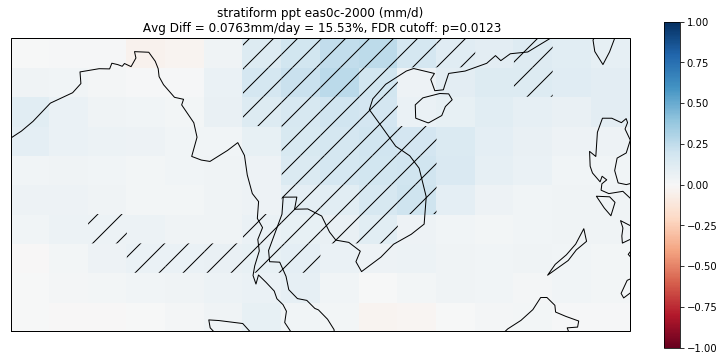

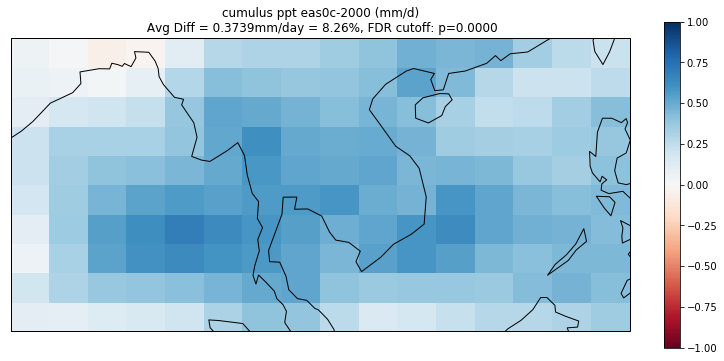

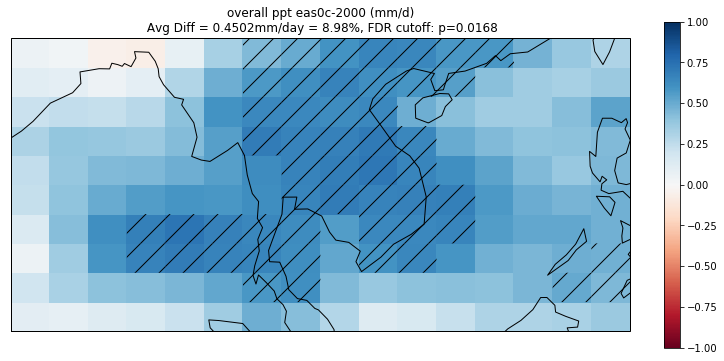

In [4]:
# print(pptcu2k.lat)
# print(pptcueas0.lon)
# print(starttime)
def ave_diff(dd2,dd1):
    pctDiff=(np.mean(dd2)-np.mean(dd1))/np.mean(dd1)*100
    return np.mean(dd2-dd1,axis=0),pctDiff

def sigMask(s2,s1):
    t1,p1 = ttest_ind(s2,s1)
    lim1 = clps.stats_fdr(p1,0.05)
    pp1 = np.ma.masked_greater(p1, lim1)
    print('new lim ',lim1,np.shape(s2),np.shape(s1))
    return pp1,lim1

def plt_diff(data1,data2,title):
    vminn=-1.
    vmaxx=1.
    ax=plt.subplot(projection=ccrs.PlateCarree())
    aveDiff,pctDiff=ave_diff(data2,data1)
    ax.pcolor(pptcl2k.lon,pptcl2k.lat,aveDiff,cmap='RdBu',vmin=vminn,vmax=vmaxx)
    # ax.contour(s1raw.lon,s1raw.lat,geo02.HGT_M[0,5:-5,5:-5],levels=[50,100,200,400,800])
    ax.coastlines()
#     ax.add_feature(cfeature.RIVERS)
    cmap = plt.get_cmap('RdBu')
    sm = plt.cm.ScalarMappable(cmap=cmap,norm=matplotlib.colors.Normalize(vmin=vminn, vmax=vmaxx))
    sm._A = []
    plt.colorbar(sm,ax=ax,fraction=0.025, pad=0.05)
    pp1,lim1=sigMask(data2,data1)
    ax.pcolor(pptcl2k.lon, pptcl2k.lat, pp1, hatch='/', alpha=0.)
    titleLine=title+'\n Avg Diff = '+str('{:.4f}'.format(np.nanmean(aveDiff)))+'mm/day = '+str('{:.2f}'.format(float(pctDiff)))+\
    '%, FDR cutoff: p='+str('{:.4f}'.format(float(lim1)))
    ax.set_title(titleLine)


plt.rcParams["figure.figsize"] = 12,6 #change inline plot size

plt.figure(1)
title='stratiform ppt eas0c-2000 (mm/d)'
plt_diff(cesmcl2000,cesmcleas0c,title)

plt.figure(2)
title='cumulus ppt eas0c-2000 (mm/d)'
plt_diff(cesmcu2000,cesmcueas0c,title)

plt.figure(3)
title='overall ppt eas0c-2000 (mm/d)'
plt_diff(cesmcl2000+cesmcu2000,cesmcleas0c+cesmcueas0c,title)
plt.show()

In [77]:
# Calculated p-value threshold

t1,p1 = ttest_ind(cesmcueas0c,cesmcu2000)
p1=np.array([np.nan,0.1,0.0001,0.000001,1,1.1,np.nan,5000])
alpha=0.1
p_sorted = np.sort(p1.flatten())  # sort the p-values
n = p_sorted.size  # number of p-values
print(n)
p_fdr = 0.0  # initialise p-value threshold - to be updated
for i in range(1, n+1):  # loop over p-values
    p_temp = p_sorted[i-1]  # next p-value to check
    print(p_temp,i*1./n*alpha)
    if p_temp <= (i * 1. / n) * alpha:
        p_fdr = (i * 1. / n) * alpha  # update p-value threshold
    else:
        break
print(p_sorted)

8
1e-06 0.0125
0.0001 0.025
0.1 0.037500000000000006
[  1.00000000e-06   1.00000000e-04   1.00000000e-01   1.00000000e+00
   1.10000000e+00   5.00000000e+03              nan              nan]


/home/likkhian/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/likkhian/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/likkhian/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [202]:
# cesmcl2000
# cesmcu2000
# cesmcleas0c
np.shape(cesmcueas0c)

#resampling wind and ppt to quarterly
def qtr_sam(data):
    time,lat,lon=np.shape(data)
    myperm=list(range(2,180))
    myperm.append(0)
    myperm.append(1)
    qtr_raw=np.reshape(data.data[myperm,:,:],(-1,4,lat,lon))
    return qtr_raw

def agg_qtr(data):
    qtr_raw=qtr_sam(data)
#     ti,lat,lon=np.shape(data)
#     qtr_shaped=np.reshape(qtr_raw.data,(-1,4,lat,lon))
    return np.mean(qtr_raw,axis=1)

def new_msk(s1,s2):
    t1,p1 = ttest_ind(s2,s1)
    lim1 = clps.stats_fdr(p1,0.1)
    print(lim1)
    pp1 = np.ma.masked_greater(p1, lim1)
    return pp1

In [68]:
np.mean(s2_u_qtr[:,:,::1,::1],axis=0)

array([[[ -7.33602762e-01,  -1.25910699e+00,  -1.68325222e+00,
          -1.90889633e+00,  -1.83409417e+00,  -1.38863730e+00,
          -1.02303565e+00,  -1.43357027e+00,  -1.41819155e+00,
          -2.80237675e+00,  -2.97267604e+00,  -2.58246613e+00,
          -2.17001295e+00,  -9.74719346e-01,  -8.54044080e-01,
          -2.02606249e+00,  -2.07963347e+00],
        [ -1.16766334e+00,  -1.90131950e+00,  -2.40626907e+00,
          -2.75318241e+00,  -2.84907174e+00,  -2.51944613e+00,
          -2.00634289e+00,  -1.93223417e+00,  -2.50867558e+00,
          -3.64390588e+00,  -4.28004122e+00,  -4.02319479e+00,
          -3.90210390e+00,  -3.21047473e+00,  -1.87281275e+00,
          -2.12670851e+00,  -1.95181906e+00],
        [ -1.47687185e+00,  -2.12970448e+00,  -2.50603509e+00,
          -2.75163817e+00,  -2.71021485e+00,  -2.25059390e+00,
          -1.87754190e+00,  -1.92343438e+00,  -2.95910692e+00,
          -3.20716453e+00,  -4.43472147e+00,  -4.87938738e+00,
          -4.70216274e+00,

0.0
0.0
0.0
0.0


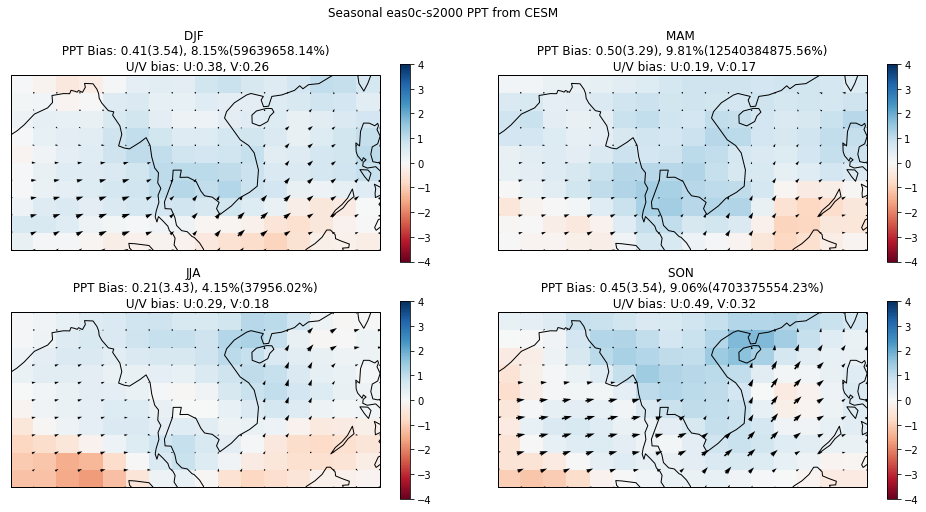

In [205]:
s1_qtr=qtr_sam(cesmcu2000+cesmcl2000)
s2_qtr=qtr_sam(cesmcueas0c+cesmcleas0c)
s1_u_qtr=qtr_sam(cesm_u_2000[:,-1,:,:])
s1_v_qtr=qtr_sam(cesm_v_2000[:,-1,:,:])
s2_u_qtr=qtr_sam(cesm_u_eas0c[:,-1,:,:])
s2_v_qtr=qtr_sam(cesm_v_eas0c[:,-1,:,:])
pptdiff=s2_qtr-s1_qtr
udiff=np.mean(s2_u_qtr[:,:,::1,::1],axis=0)-np.mean(s1_u_qtr[:,:,::1,::1],axis=0)
vdiff=np.mean(s2_v_qtr[:,:,::1,::1],axis=0)-np.mean(s1_v_qtr[:,:,::1,::1],axis=0)

quarters={1:'DJF',2:'MAM',3:'JJA',4:'SON'}

plt.rcParams["figure.figsize"] = 16,8    
slon1 = pptcl2k.lon[0::1]
slat1 = pptcl2k.lat[0::1]
cmap = plt.get_cmap('RdBu')
vminn=-4
vmaxx=4
scale=50
sm = plt.cm.ScalarMappable(cmap=cmap,norm=matplotlib.colors.Normalize(vmin=vminn, vmax=vmaxx))
sm._A = []
def draw_title(tt):
    return str('{} \n PPT Bias: {:.2f}({:.2f}), {:.2f}%({:.2f}%) \n U/V bias: U:{:.2f}, V:{:.2f}'.format(quarters[tt+1],np.nanmean(pptdiff[:,tt,:,:]),\
            np.std(pptdiff[:,tt,:,:]), (np.nanmean(pptdiff[:,tt,:,:])/np.nanmean(s1_qtr[:,tt,:,:])*100),np.std(pptdiff[:,tt,:,:]/s1_qtr[:,tt,:,:]*100), \
            float(np.mean(udiff[tt,:,:])),float(np.mean(vdiff[tt,:,:])) ))
def draw_qtr_plt(ax,tt):
    ax.pcolormesh(pptcl2k.lon, pptcl2k.lat,np.mean(pptdiff[:,tt,:,:],axis=0),vmin=vminn,vmax=vmaxx,cmap=cmap)
    ax.pcolor(pptcl2k.lon, pptcl2k.lat, new_msk(s1_qtr[:,tt,:,:],s2_qtr[:,tt,:,:]), hatch='/', alpha=0.)
    ax.quiver(slon1,slat1,udiff[tt,:,:],vdiff[tt,:,:],pivot='middle',scale=scale)
    ax.coastlines()
    plt.colorbar(sm,ax=ax,fraction=0.04, pad=0.05)
    ax.set_title(draw_title(tt))
    

ax1=plt.subplot(2,2,1,projection=ccrs.PlateCarree())
draw_qtr_plt(ax1,0)
ax2=plt.subplot(2,2,2,projection=ccrs.PlateCarree())
draw_qtr_plt(ax2,1)
ax3=plt.subplot(2,2,3,projection=ccrs.PlateCarree())
draw_qtr_plt(ax3,2)
ax4=plt.subplot(2,2,4,projection=ccrs.PlateCarree())
draw_qtr_plt(ax4,3)
plt.suptitle('Seasonal eas0c-s2000 PPT from CESM')
plt.show()

/home/likkhian/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/likkhian/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/likkhian/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


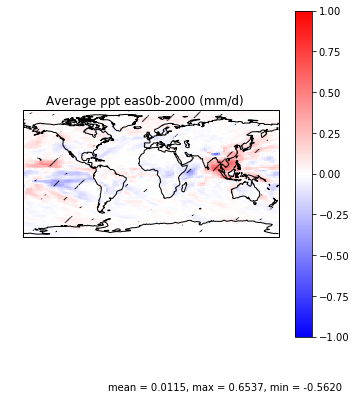

In [4]:
#seasonal outputs. 0=jan ... 11=dec

pptcl2ka=pptcl2k.PRECL.data.reshape((-1,12,nlat,nlon))
pptcl2kb=pptcl2ka[:,:,:,:].reshape((-1,nlat,nlon))
pptcu2ka=pptcu2k.PRECC.data.reshape((-1,12,nlat,nlon))
pptcu2kb=pptcu2ka[:,:,:,:].reshape((-1,nlat,nlon))
pptcleas0a=pptcleas0.PRECL.data.reshape((-1,12,nlat,nlon))
pptcleas0b=pptcleas0a[:,:,:,:].reshape((-1,nlat,nlon))
pptcueas0a=pptcueas0.PRECC.data.reshape((-1,12,nlat,nlon))
pptcueas0b=pptcueas0a[:,:,:,:].reshape((-1,nlat,nlon))

#ignore transient period 3*40yrs
starttime=120

t1,p1 = ttest_ind(pptcleas0b[starttime:,:,:],pptcl2kb[starttime:,:,:])
pp1 = np.ma.masked_greater(p1, 0.1)
t2,p2 = ttest_ind(pptcueas0b[starttime:,:,:],pptcu2kb[starttime:,:,:])
pp2 = np.ma.masked_greater(p2, 0.1)
t3,p3 = ttest_ind(pptcleas0b[starttime:,:,:]+pptcueas0b[starttime:,:,:],pptcl2kb[starttime:,:,:]+pptcu2kb[starttime:,:,:])
pp3 = np.ma.masked_greater(p3, 0.1)

# plt.rcParams["figure.figsize"] = 10,6 #change inline plot size
# plt.figure(1)
# plt.subplot(projection=ccrs.PlateCarree())
# plt.pcolor(lons, lats,np.mean(pptcleas0b[starttime:,:,:]-pptcl2kb[starttime:,:,:],axis=0)*units,cmap='bwr',vmax=0.5,vmin=-0.5)
# ax=plt.gca()
# ax.set_title('stratiform ppt eas0-2000 (mm/d)')
# ax.coastlines()
# plt.colorbar()
# plt.pcolor(lons, lats, pp1, hatch='/', alpha=0.)

# plt.figure(2)
# plt.subplot(projection=ccrs.PlateCarree())
# plt.pcolor(lons, lats,np.mean(pptcueas0b[starttime:,:,:]-pptcu2kb[starttime:,:,:],axis=0)*units,cmap='bwr',vmax=0.5,vmin=-0.5)
# ax=plt.gca()
# ax.set_title('cumulus ppt eas0-2000 (mm/d)')
# ax.coastlines()
# plt.colorbar()
# plt.pcolor(lons, lats, pp2, hatch='/', alpha=0.)

netdiff=pptcleas0b[starttime:,:,:]+pptcueas0b[starttime:,:,:]-pptcl2kb[starttime:,:,:]-pptcu2kb[starttime:,:,:]
plt.figure(3)
plt.subplot(projection=ccrs.PlateCarree())
plt.pcolor(lons, lats,np.mean(netdiff,axis=0)*units,cmap='bwr',vmax=1,vmin=-1)
ax=plt.gca()
ax.set_title('Average ppt eas0b-2000 (mm/d)')
ax.coastlines()
plt.colorbar()
plt.pcolor(lons, lats, pp3, hatch='/', alpha=0.)
plt.figtext(0.35,0,'mean = {:.4f}, max = {:.4f}, min = {:.4f}'.format(units*np.mean(netdiff),\
                                                     units*np.max(np.mean(netdiff,axis=0)),\
                                                     units*np.min(np.mean(netdiff,axis=0))))
plt.show()

# Comparison with wrf downscalling

In [141]:
print(np.mean(wrfout))

<xarray.Dataset>
Dimensions:   ()
Data variables:
    PPT       float64 12.94
    RAINNC    float64 2.031
    LANDMASK  float64 0.3184
    U10       float64 -1.057
    V10       float64 0.2941
    T2        float64 298.3
    SWDOWN    float64 185.7


(61, 7, 6)
qtr = 1
CESM mean=1.0799,var=1.0494. WRF27km mean=2.7108,var=20.0393. WRF9km mean=0.9552,var=2.4474


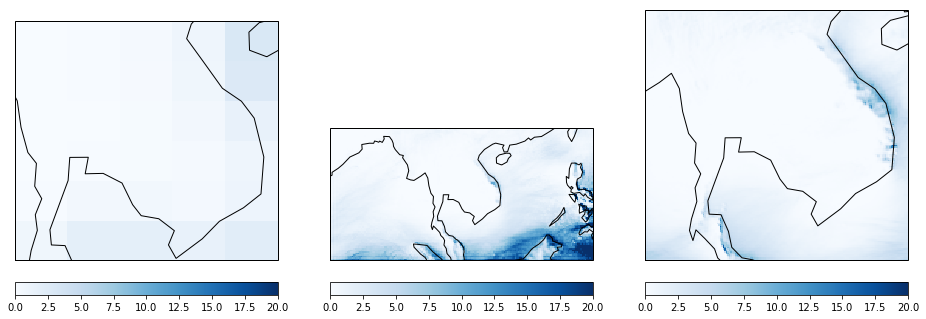

qtr = 2
CESM mean=0.9958,var=0.2318. WRF27km mean=1.1645,var=3.1823. WRF9km mean=0.8311,var=0.3324


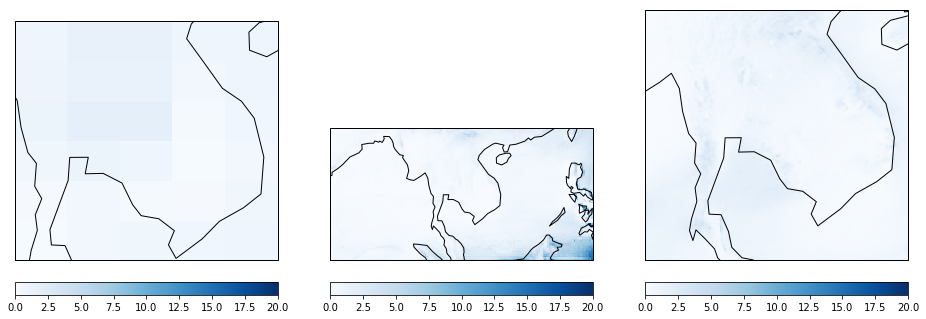

qtr = 3
CESM mean=4.7433,var=1.0954. WRF27km mean=7.8055,var=16.1789. WRF9km mean=7.5493,var=19.7011


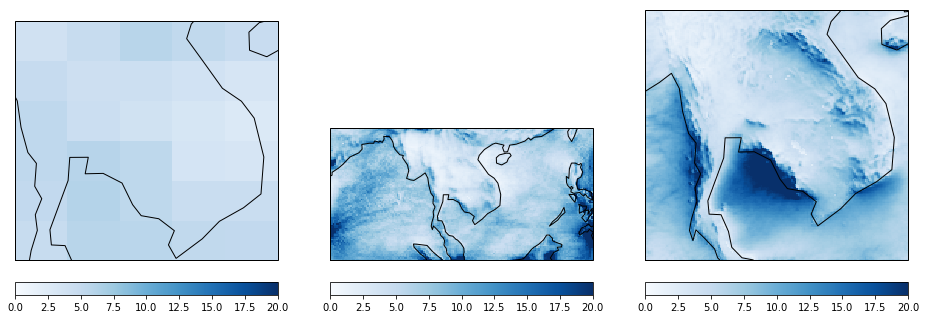

qtr = 4
CESM mean=7.5018,var=4.8156. WRF27km mean=13.1391,var=25.4486. WRF9km mean=13.9778,var=49.0028


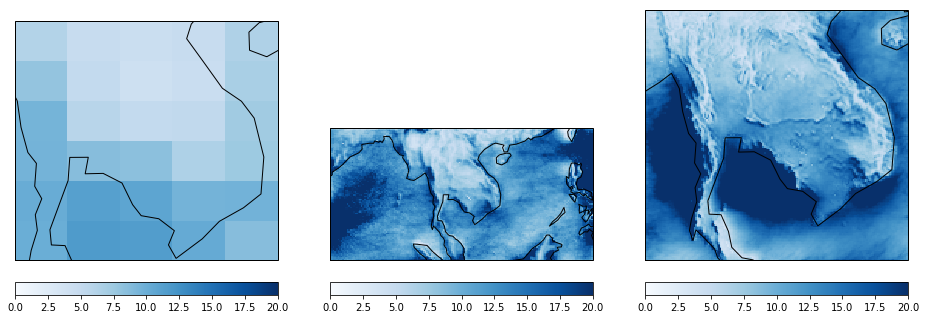

In [125]:
plt.rcParams["figure.figsize"] = 16,8
wrfout=xr.open_dataset('../cesm_output_convert/analysis/downscale_results/wrfpost_run2d_2000_d01.nc')
wrfout2=xr.open_dataset('../cesm_output_convert/analysis/downscale_results/wrfpost_run2d_2000_d02.nc')
wrfppt=wrfout.PPT.resample('3M',dim='time',how='mean')
wrfppt2=wrfout2.PPT.resample('3M',dim='time',how='mean')
cesmpptout=cesmcu2000+cesmcl2000
# timess=pd.period_range('0090-01-01', '0094-12-01', freq='M').to_timestamp()
# cesmpptoutput = xr.DataArray(cesmpptout, coords=[timess, cesmpptout.coords['lat'],cesmpptout.coords['lon']], dims=['time', 'lat','lon'])
cesmppt=cesmpptout.resample('3M',dim='time',how='mean')
print(np.shape(cesmppt))
for tt in range(0,4):
    print('qtr = '+str(tt+1))
    plt.figure(tt)
    ax1=plt.subplot(1,3,1,projection=ccrs.PlateCarree())
    ax1.pcolor(lons, lats,cesmppt[tt,:,:]*units,vmin=0,vmax=20,cmap='Blues')
    ax1.coastlines()
    cmap = plt.get_cmap('Blues')
    sm = plt.cm.ScalarMappable(cmap=cmap,norm=matplotlib.colors.Normalize(vmin=0, vmax=20))
    sm._A = []
    plt.colorbar(sm,ax=ax1,fraction=0.04, pad=0.05, orientation='horizontal')
    ax2=plt.subplot(1,3,2,projection=ccrs.PlateCarree())
    ax2.pcolor(wrfout.lon,wrfout.lat,wrfppt[tt,:,:],vmin=0,vmax=20,cmap='Blues')
    ax2.coastlines()
    cmap = plt.get_cmap('Blues')
    sm = plt.cm.ScalarMappable(cmap=cmap,norm=matplotlib.colors.Normalize(vmin=0, vmax=20))
    sm._A = []
    plt.colorbar(sm,ax=ax2,fraction=0.04, pad=0.05, orientation='horizontal')
    ax3=plt.subplot(1,3,3,projection=ccrs.PlateCarree())
    ax3.pcolor(wrfout2.lon,wrfout2.lat,wrfppt2[tt,:,:],vmin=0,vmax=20,cmap='Blues')
    ax3.coastlines()
    cmap = plt.get_cmap('Blues')
    sm = plt.cm.ScalarMappable(cmap=cmap,norm=matplotlib.colors.Normalize(vmin=0, vmax=20))
    sm._A = []
    plt.colorbar(sm,ax=ax3,fraction=0.04, pad=0.05, orientation='horizontal')
    print('CESM mean={:.4f},var={:.4f}. WRF27km mean={:.4f},var={:.4f}. WRF9km mean={:.4f},var={:.4f}'.format \
          (float(np.mean(cesmppt[tt,:,:]*units)),float(np.var(cesmppt[tt,:,:]*units)),float(np.mean(wrfppt[tt,:,:])), \
           float(np.var(wrfppt[tt,:,:])),float(np.mean(wrfppt2[tt,:,:])),float(np.var(wrfppt2[tt,:,:]))))
    plt.show()

In [94]:
print(wrfout.lat[0].data,wrfout.lat[-1].data,wrfout.lon[0].data,wrfout.lon[-1].data)
print(wrfout2.lat[0].data,wrfout2.lat[-1].data,wrfout2.lon[0].data,wrfout2.lon[-1].data)

2.919708251953125 24.17534637451172 81.90802001953125 124.16838073730469
6.739631652832031 20.397010803222656 95.7447509765625 110.08158874511719


In [68]:

print(cesmpptout)
timess=pd.period_range('0090-01-01', '0094-12-01', freq='M')
timess=timess.to_timestamp()
# print(timess)
cesmpptoutput = xr.DataArray(cesmpptout, coords=[timess, cesmpptout.coords['lat'],cesmpptout.coords['lon']], dims=['time', 'lat','lon'])
print(cesmpptoutput)


<xarray.DataArray (time: 60, lat: 11, lon: 17)>
array([[[  5.210526e-08,   8.631764e-08, ...,   6.226972e-08,   9.122224e-08],
        [  2.640589e-08,   4.208907e-08, ...,   4.016912e-08,   5.648607e-08],
        ..., 
        [  3.802048e-10,   6.268231e-10, ...,   8.425056e-09,   5.288226e-09],
        [  1.971630e-10,   3.496047e-10, ...,   1.667534e-09,   2.861187e-09]],

       [[  1.178704e-08,   1.399470e-08, ...,   2.293616e-08,   1.982005e-08],
        [  9.912434e-09,   9.610786e-09, ...,   1.269580e-08,   1.092304e-08],
        ..., 
        [  1.325866e-09,   2.552055e-09, ...,   2.364436e-08,   3.197993e-08],
        [  2.200818e-09,   1.356532e-09, ...,   2.287222e-08,   4.320303e-08]],

       ..., 
       [[  8.544765e-08,   8.556219e-08, ...,   7.978110e-08,   8.947058e-08],
        [  6.746302e-08,   7.443072e-08, ...,   9.880945e-08,   9.740438e-08],
        ..., 
        [  1.044637e-08,   2.889639e-08, ...,   5.727041e-08,   7.433052e-08],
        [  1.430670e-08,

In [17]:
ts2000a=xr.open_dataset(dirctl+'p17d_b_2000/atm/p17d_b_2000.cam.h0.TS.nc')
# print(pptcu2k)
tseas0ca=xr.open_dataset(dirctl+'p17d_b_eas0b/atm/p17d_b_eas0b.cam.h0.TS.nc')
ts2000=ts2000a.sel(lat=slice(latmin, latmax),lon=slice(lonmin,lonmax))
tseas0c=tseas0ca.sel(lat=slice(latmin, latmax),lon=slice(lonmin,lonmax))

/home/likkhian/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:393: RuntimeWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy netCDF4.datetime objects instead, reason: dates out of range
  result = decode_cf_datetime(example_value, units, calendar)
/home/likkhian/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:412: RuntimeWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy netCDF4.datetime objects instead, reason: dates out of range
  calendar=self.calendar)


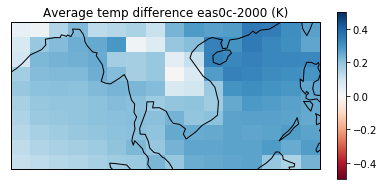

<xarray.DataArray 'TS' ()>
array(0.26043701171875)


In [135]:
tsdiff=np.mean(tseas0c.TS,axis=0)-np.mean(ts2000.TS,axis=0)
tslons=tseas0c.lon
tslats=tseas0c.lat
plt.subplot(projection=ccrs.PlateCarree())
plt.pcolor(tslons, tslats,tsdiff,cmap='RdBu',vmax=0.5,vmin=-0.5)
ax=plt.gca()
ax.set_title('Average temp difference eas0c-2000 (K)')
ax.coastlines()
cmap = plt.get_cmap('RdBu')
sm = plt.cm.ScalarMappable(cmap=cmap,norm=matplotlib.colors.Normalize(vmin=-0.5, vmax=0.5))
sm._A = []
plt.colorbar(sm,ax=ax,fraction=0.025, pad=0.05)
plt.show()
print(np.mean(tseas0c.TS)-np.mean(ts2000.TS))

In [9]:
np.set_printoptions(threshold=np.inf)
# a = np.asarray([i for i in range(24) for _ in range(0)]).reshape((24, 3, 3))
# print(a)
# aa = a.reshape((-1,3,4,3,3))
# print(aa[:,:,2,:,:].reshape((-1,3,3)))
a=np.asarray([i for i in range(24) for _ in range(9)])
aa=a.reshape((24,3,3))
print(aa)
aaa=aa.reshape((-1,12,3,3))
print(np.shape(aaa))
print(aaa[:,5:8,:,:].reshape((-1,3,3)))

[[[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 1  1  1]
  [ 1  1  1]
  [ 1  1  1]]

 [[ 2  2  2]
  [ 2  2  2]
  [ 2  2  2]]

 [[ 3  3  3]
  [ 3  3  3]
  [ 3  3  3]]

 [[ 4  4  4]
  [ 4  4  4]
  [ 4  4  4]]

 [[ 5  5  5]
  [ 5  5  5]
  [ 5  5  5]]

 [[ 6  6  6]
  [ 6  6  6]
  [ 6  6  6]]

 [[ 7  7  7]
  [ 7  7  7]
  [ 7  7  7]]

 [[ 8  8  8]
  [ 8  8  8]
  [ 8  8  8]]

 [[ 9  9  9]
  [ 9  9  9]
  [ 9  9  9]]

 [[10 10 10]
  [10 10 10]
  [10 10 10]]

 [[11 11 11]
  [11 11 11]
  [11 11 11]]

 [[12 12 12]
  [12 12 12]
  [12 12 12]]

 [[13 13 13]
  [13 13 13]
  [13 13 13]]

 [[14 14 14]
  [14 14 14]
  [14 14 14]]

 [[15 15 15]
  [15 15 15]
  [15 15 15]]

 [[16 16 16]
  [16 16 16]
  [16 16 16]]

 [[17 17 17]
  [17 17 17]
  [17 17 17]]

 [[18 18 18]
  [18 18 18]
  [18 18 18]]

 [[19 19 19]
  [19 19 19]
  [19 19 19]]

 [[20 20 20]
  [20 20 20]
  [20 20 20]]

 [[21 21 21]
  [21 21 21]
  [21 21 21]]

 [[22 22 22]
  [22 22 22]
  [22 22 22]]

 [[23 23 23]
  [23 23 23]
  [23 23 23]]]
(2, 12, 3, 3)
[[

In [3]:
pptcu2k
def extract_years(ppt):
    extract=np.empty([12*15,11,17])
    extract[:12*5]=ppt[12*50:12*55]
    extract[12*5:12*10]=ppt[12*69:12*74]
    extract[12*10:]=ppt[12*90:12*95]
    return extract
pptcu2k15=extract_years(pptcu2k.PRECC)
pptcl2k15=extract_years(pptcl2k.PRECL)
pptcueas015=extract_years(pptcueas0.PRECC)
pptcleas015=extract_years(pptcleas0.PRECL)
print(np.shape(pptcu2k.PRECC))

(1200, 11, 17)


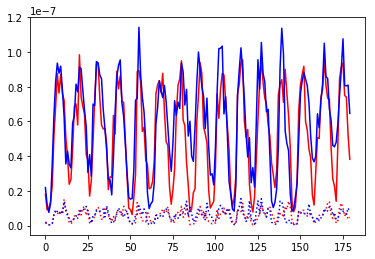

In [4]:
plt.plot(np.mean(pptcu2k15,axis=(1,2)),'r-')
plt.plot(np.mean(pptcl2k15,axis=(1,2)),'r:')
plt.plot(np.mean(pptcueas015,axis=(1,2)),'b-')
plt.plot(np.mean(pptcleas015,axis=(1,2)),'b:')
plt.show()

In [154]:
#extract and condition wrfdata
s1a_d01=xr.open_dataset('../cesm_output_convert/analysis/downscale_results/wrfpost_run_2000_01_d01.nc')
s1b_d01=xr.open_dataset('../cesm_output_convert/analysis/downscale_results/wrfpost_run_2000_02_d01.nc')
s1c_d01=xr.open_dataset('../cesm_output_convert/analysis/downscale_results/wrfpost_run_2000_03_d01.nc')
s2a_d01=xr.open_dataset('../cesm_output_convert/analysis/downscale_results/wrfpost_run_eas0c_01_d01.nc')
s2b_d01=xr.open_dataset('../cesm_output_convert/analysis/downscale_results/wrfpost_run_eas0c_02_d01.nc')
s2c_d01=xr.open_dataset('../cesm_output_convert/analysis/downscale_results/wrfpost_run_eas0c_03_d01.nc')
time_a=pd.date_range('2000-01-01', periods=1825)
time_b=pd.date_range('2005-01-01', periods=1825)
time_c=pd.date_range('2010-01-01', periods=1825)
s1a_d01['time']=time_a
s1b_d01['time']=time_b
s1c_d01['time']=time_c
s2a_d01['time']=time_a
s2b_d01['time']=time_b
s2c_d01['time']=time_c
s1raw_d01=xr.concat([s1a_d01,s1b_d01,s1c_d01],dim='time')
s2raw_d01=xr.concat([s2a_d01,s2b_d01,s2c_d01],dim='time')
#slice to d02 domain. comment to use whole domain
#latmin and latmax from 1st segment defining cesm domain
# s1raw_d01=s1raw_d01.sel(lat=slice(latmin, latmax),lon=slice(lonmin,lonmax))
# s2raw_d01=s2raw_d01.sel(lat=slice(latmin, latmax),lon=slice(lonmin,lonmax))


s1a_d02=xr.open_dataset('../cesm_output_convert/analysis/downscale_results/wrfpost_run_2000_01_d02.nc')
s1b_d02=xr.open_dataset('../cesm_output_convert/analysis/downscale_results/wrfpost_run_2000_02_d02.nc')
s1c_d02=xr.open_dataset('../cesm_output_convert/analysis/downscale_results/wrfpost_run_2000_03_d02.nc')
s2a_d02=xr.open_dataset('../cesm_output_convert/analysis/downscale_results/wrfpost_run_eas0c_01_d02.nc')
s2b_d02=xr.open_dataset('../cesm_output_convert/analysis/downscale_results/wrfpost_run_eas0c_02_d02.nc')
s2c_d02=xr.open_dataset('../cesm_output_convert/analysis/downscale_results/wrfpost_run_eas0c_03_d02.nc')
s1a_d02['time']=time_a
s1b_d02['time']=time_b
s1c_d02['time']=time_c
s2a_d02['time']=time_a
s2b_d02['time']=time_b
s2c_d02['time']=time_c
s1raw_d02=xr.concat([s1a_d02,s1b_d02,s1c_d02],dim='time')
s2raw_d02=xr.concat([s2a_d02,s2b_d02,s2c_d02],dim='time')

#resample wrf data to monthly
s1_mth_d01_cl=s1raw_d01.RAINNC.resample('1M',dim='time',how='mean')
s1_mth_d01_cu=s1raw_d01.PPT.resample('1M',dim='time',how='mean')-s1_mth_d01_cl
s1_mth_d01_ppt=s1raw_d01.PPT.resample('1M',dim='time',how='mean')
s2_mth_d01_cl=s2raw_d01.RAINNC.resample('1M',dim='time',how='mean')
s2_mth_d01_cu=s2raw_d01.PPT.resample('1M',dim='time',how='mean')-s2_mth_d01_cl
s2_mth_d01_ppt=s2raw_d01.PPT.resample('1M',dim='time',how='mean')

s1_mth_d02_cl=s1raw_d02.RAINNC.resample('1M',dim='time',how='mean')
s1_mth_d02_cu=s1raw_d02.PPT.resample('1M',dim='time',how='mean')-s1_mth_d02_cl
s1_mth_d02_ppt=s1raw_d02.PPT.resample('1M',dim='time',how='mean')
s2_mth_d02_cl=s2raw_d02.RAINNC.resample('1M',dim='time',how='mean')
s2_mth_d02_cu=s2raw_d02.PPT.resample('1M',dim='time',how='mean')-s2_mth_d02_cl
s2_mth_d02_ppt=s2raw_d02.PPT.resample('1M',dim='time',how='mean')

s1_ann_d01_cl=s1_mth_d01_cl.groupby('time.month').mean()
s1_ann_d01_cu=s1_mth_d01_cu.groupby('time.month').mean()
s2_ann_d01_cl=s2_mth_d01_cl.groupby('time.month').mean()
s2_ann_d01_cu=s2_mth_d01_cu.groupby('time.month').mean()

s1_ann_d02_cl=s1_mth_d02_cl.groupby('time.month').mean()
s1_ann_d02_cu=s1_mth_d02_cu.groupby('time.month').mean()
s2_ann_d02_cl=s2_mth_d02_cl.groupby('time.month').mean()
s2_ann_d02_cu=s2_mth_d02_cu.groupby('time.month').mean()

def calculate_sem_d01(ppt_data):
    leng,lat,lon=np.shape(ppt_data)
    return sem(np.mean(np.reshape(ppt_data.data,(-1,12,lat,lon)),axis=(2,3)),axis=0)
def calculate_sem_d02(ppt_data):
    return sem(np.mean(np.reshape(ppt_data.data,(-1,12,170,173)),axis=(2,3)),axis=0)
s1_ann_d01_cu_sd=calculate_sem_d01(s1_mth_d01_cu)
s1_ann_d01_cl_sd=calculate_sem_d01(s1_mth_d01_cl)
s2_ann_d01_cu_sd=calculate_sem_d01(s2_mth_d01_cu)
s2_ann_d01_cl_sd=calculate_sem_d01(s2_mth_d01_cl)

s1_ann_d02_cu_sd=calculate_sem_d02(s1_mth_d02_cu)
s1_ann_d02_cl_sd=calculate_sem_d02(s1_mth_d02_cl)
s2_ann_d02_cu_sd=calculate_sem_d02(s2_mth_d02_cu)
s2_ann_d02_cl_sd=calculate_sem_d02(s2_mth_d02_cl)


d01 (15, 89, 170)
<xarray.DataArray ()>
array(10.909528010902932) 0.61823863201
<xarray.DataArray ()>
array(11.499413915203018) 0.586206623869
<xarray.DataArray 'RAINNC' ()>
array(2.0318375407633487) 0.176430001046
<xarray.DataArray 'RAINNC' ()>
array(2.1563234566169536) 0.177263235805
<xarray.DataArray 'PPT' ()>
array(12.941365551666623) 0.78828991512
<xarray.DataArray 'PPT' ()>
array(13.655737371819592) 0.756923873787
d02 (15, 170, 173)
<xarray.DataArray ()>
array(7.486779888236349) 0.252409127356
<xarray.DataArray ()>
array(8.251305066274842) 0.297349623692
<xarray.DataArray 'RAINNC' ()>
array(1.9680898483700302) 0.175196729876
<xarray.DataArray 'RAINNC' ()>
array(2.2264640804229137) 0.188729753402
<xarray.DataArray 'PPT' ()>
array(9.4548697366063) 0.395024483926
<xarray.DataArray 'PPT' ()>
array(10.477769146697511) 0.460077381565


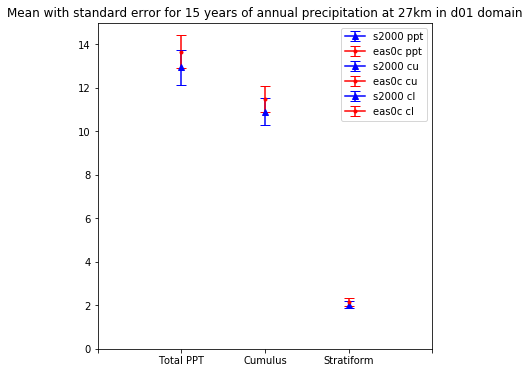

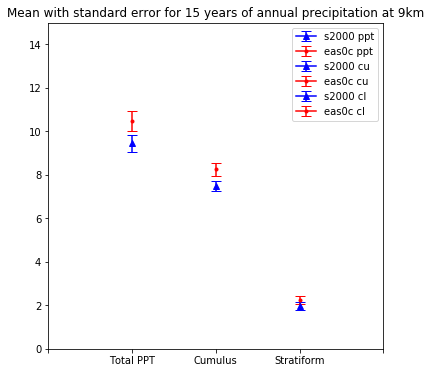

In [17]:
#Resample wrf data to yearly
landmsk=s1raw_d01['LANDMASK'].data
landmsk[landmsk==0]=np.nan
landmsk2=s1raw_d02['LANDMASK'].data
landmsk2[landmsk2==0]=np.nan
landmsk=1
landmsk2=1

s1_yr_d01_cl=(s1raw_d01.RAINNC*landmsk).resample('AS',dim='time',how='mean')
s1_yr_d01_cu=(s1raw_d01.PPT*landmsk).resample('AS',dim='time',how='mean')-s1_yr_d01_cl
s1_yr_d01_ppt=(s1raw_d01.PPT*landmsk).resample('AS',dim='time',how='mean')
s2_yr_d01_cl=(s2raw_d01.RAINNC*landmsk).resample('AS',dim='time',how='mean')
s2_yr_d01_cu=(s2raw_d01.PPT*landmsk).resample('AS',dim='time',how='mean')-s2_yr_d01_cl
s2_yr_d01_ppt=(s2raw_d01.PPT*landmsk).resample('AS',dim='time',how='mean')

s1_yr_d02_cl=(s1raw_d02.RAINNC*landmsk2).resample('AS',dim='time',how='mean')
s1_yr_d02_cu=(s1raw_d02.PPT*landmsk2).resample('AS',dim='time',how='mean')-s1_yr_d02_cl
s1_yr_d02_ppt=(s1raw_d02.PPT*landmsk2).resample('AS',dim='time',how='mean')
s2_yr_d02_cl=(s2raw_d02.RAINNC*landmsk2).resample('AS',dim='time',how='mean')
s2_yr_d02_cu=(s2raw_d02.PPT*landmsk2).resample('AS',dim='time',how='mean')-s2_yr_d02_cl
s2_yr_d02_ppt=(s2raw_d02.PPT*landmsk2).resample('AS',dim='time',how='mean')

# s1_yr_cesm_cl=cesmcl2000.resample('AS',dim='time',how='mean')
# s1_yr_cesm_cu=cesmcu2000.resample('AS',dim='time',how='mean')
# s1_yr_cesm_ppt=s1_yr_cesm_cl+s1_yr_cesm_cu
# s2_yr_cesm_cl=cesmcleas0c.resample('AS',dim='time',how='mean')
# s2_yr_cesm_cu=cesmcueas0c.resample('AS',dim='time',how='mean')
# s2_yr_cesm_ppt=s2_yr_cesm_cl+s2_yr_cesm_cu

np.shape(s1_yr_d01_cu)
print('d01',np.shape(s1_yr_d01_cu))
print(np.mean(s1_yr_d01_cu),sem(np.mean(s1_yr_d01_cu,axis=(1,2))))
print(np.mean(s2_yr_d01_cu),sem(np.mean(s2_yr_d01_cu,axis=(1,2))))
print(np.mean(s1_yr_d01_cl),sem(np.mean(s1_yr_d01_cl,axis=(1,2))))
print(np.mean(s2_yr_d01_cl),sem(np.mean(s2_yr_d01_cl,axis=(1,2))))
print(np.mean(s1_yr_d01_ppt),sem(np.mean(s1_yr_d01_ppt,axis=(1,2))))
print(np.mean(s2_yr_d01_ppt),sem(np.mean(s2_yr_d01_ppt,axis=(1,2))))
print('d02',np.shape(s1_yr_d02_cu))
print(np.mean(s1_yr_d02_cu),sem(np.mean(s1_yr_d02_cu,axis=(1,2))))
print(np.mean(s2_yr_d02_cu),sem(np.mean(s2_yr_d02_cu,axis=(1,2))))
print(np.mean(s1_yr_d02_cl),sem(np.mean(s1_yr_d02_cl,axis=(1,2))))
print(np.mean(s2_yr_d02_cl),sem(np.mean(s2_yr_d02_cl,axis=(1,2))))
print(np.mean(s1_yr_d02_ppt),sem(np.mean(s1_yr_d02_ppt,axis=(1,2))))
print(np.mean(s2_yr_d02_ppt),sem(np.mean(s2_yr_d02_ppt,axis=(1,2))))
# print('cesm',np.shape(s1_yr_cesm_cu))
# print(np.mean(s1_yr_cesm_cu),sem(np.mean(s1_yr_cesm_cu,axis=(1,2))))
# print(np.mean(s2_yr_cesm_cu),sem(np.mean(s2_yr_cesm_cu,axis=(1,2))))
# print(np.mean(s1_yr_cesm_cl),sem(np.mean(s1_yr_cesm_cl,axis=(1,2))))
# print(np.mean(s2_yr_cesm_cl),sem(np.mean(s2_yr_cesm_cl,axis=(1,2))))
# print(np.mean(s1_yr_cesm_ppt),sem(np.mean(s1_yr_cesm_ppt,axis=(1,2))))
# print(np.mean(s2_yr_cesm_ppt),sem(np.mean(s2_yr_cesm_ppt,axis=(1,2))))

plt.rcParams["figure.figsize"] = 6,6

plt.figure(1)
plt.errorbar(2,np.mean(s1_yr_d01_ppt),sem(np.mean(s1_yr_d01_ppt,axis=(1,2))), marker='^',capsize=5,color='b',label='s2000 ppt')
plt.errorbar(2,np.mean(s2_yr_d01_ppt),sem(np.mean(s2_yr_d01_ppt,axis=(1,2))), marker='.',capsize=5,color='r',label='eas0c ppt')
plt.errorbar(3,np.mean(s1_yr_d01_cu),sem(np.mean(s1_yr_d01_cu,axis=(1,2))), marker='^',capsize=5,color='b',label='s2000 cu')
plt.errorbar(3,np.mean(s2_yr_d01_cu),sem(np.mean(s2_yr_d01_cu,axis=(1,2))), marker='.',capsize=5,color='r',label='eas0c cu')
plt.errorbar(4,np.mean(s1_yr_d01_cl),sem(np.mean(s1_yr_d01_cl,axis=(1,2))), marker='^',capsize=5,color='b',label='s2000 cl')
plt.errorbar(4,np.mean(s2_yr_d01_cl),sem(np.mean(s2_yr_d01_cl,axis=(1,2))), marker='.',capsize=5,color='r',label='eas0c cl')
plt.ylim(0,15)
my_xticks=['','Total PPT','Cumulus','Stratiform','']
plt.xticks([1,2,3,4,5],my_xticks)
plt.title('Mean with standard error for 15 years of annual precipitation at 27km in d01 domain')
plt.legend()

plt.figure(2)
plt.errorbar(2,np.mean(s1_yr_d02_ppt),sem(np.mean(s1_yr_d02_ppt,axis=(1,2))), marker='^',capsize=5,color='b',label='s2000 ppt')
plt.errorbar(2,np.mean(s2_yr_d02_ppt),sem(np.mean(s2_yr_d02_ppt,axis=(1,2))), marker='.',capsize=5,color='r',label='eas0c ppt')
plt.errorbar(3,np.mean(s1_yr_d02_cu),sem(np.mean(s1_yr_d02_cu,axis=(1,2))), marker='^',capsize=5,color='b',label='s2000 cu')
plt.errorbar(3,np.mean(s2_yr_d02_cu),sem(np.mean(s2_yr_d02_cu,axis=(1,2))), marker='.',capsize=5,color='r',label='eas0c cu')
plt.errorbar(4,np.mean(s1_yr_d02_cl),sem(np.mean(s1_yr_d02_cl,axis=(1,2))), marker='^',capsize=5,color='b',label='s2000 cl')
plt.errorbar(4,np.mean(s2_yr_d02_cl),sem(np.mean(s2_yr_d02_cl,axis=(1,2))), marker='.',capsize=5,color='r',label='eas0c cl')
# plt.xlim(0,4)
plt.ylim(0,15)
my_xticks=['','Total PPT','Cumulus','Stratiform','']
plt.xticks([1,2,3,4,5],my_xticks)
plt.title('Mean with standard error for 15 years of annual precipitation at 9km')
plt.legend()

# plt.figure(3)
# plt.errorbar(2,np.mean(s1_yr_cesm_ppt),sem(np.mean(s1_yr_cesm_ppt,axis=(1,2))), marker='^',capsize=5,color='b',label='s2000 ppt')
# plt.errorbar(2,np.mean(s2_yr_cesm_ppt),sem(np.mean(s2_yr_cesm_ppt,axis=(1,2))), marker='.',capsize=5,color='r',label='eas0c ppt')
# plt.errorbar(3,np.mean(s1_yr_cesm_cu),sem(np.mean(s1_yr_cesm_cu,axis=(1,2))), marker='^',capsize=5,color='b',label='s2000 cu')
# plt.errorbar(3,np.mean(s2_yr_cesm_cu),sem(np.mean(s2_yr_cesm_cu,axis=(1,2))), marker='.',capsize=5,color='r',label='eas0c cu')
# plt.errorbar(4,np.mean(s1_yr_cesm_cl),sem(np.mean(s1_yr_cesm_cl,axis=(1,2))), marker='^',capsize=5,color='b',label='s2000 cl')
# plt.errorbar(4,np.mean(s2_yr_cesm_cl),sem(np.mean(s2_yr_cesm_cl,axis=(1,2))), marker='.',capsize=5,color='r',label='eas0c cl')
# # plt.xlim(0,4)
# plt.ylim(0,15)
# my_xticks=['','Total PPT','Cumulus','Stratiform','']
# plt.xticks([1,2,3,4,5],my_xticks)
# plt.title('Mean with standard error for 15 years of annual precipitation using CESM')
# plt.legend()
plt.show()

In [34]:
#ttest of domain means
print(np.shape(np.mean(s2_yr_d02_cu,axis=(1,2))))
t1,p1 = ttest_ind(s2_yr_d02_cu,s1_yr_d02_cu)
p1

(15,)


array([[ 0.28223442,  0.23166629,  0.16473465, ...,  0.11517265,
         0.11937416,  0.09154832],
       [ 0.34862136,  0.29978498,  0.23182146, ...,  0.11677025,
         0.11921253,  0.12991855],
       [ 0.36449255,  0.37698612,  0.30397524, ...,  0.11399296,
         0.11283396,  0.10471465],
       ..., 
       [ 0.84763791,  0.78931604,  0.56269704, ...,  0.50027769,
         0.48696956,  0.5821923 ],
       [ 0.62694735,  0.59236212,  0.4783472 , ...,  0.66515264,
         0.51035717,  0.6375228 ],
       [ 0.5003987 ,  0.50201305,  0.42688258, ...,  0.41597646,
         0.42850834,  0.49947417]])

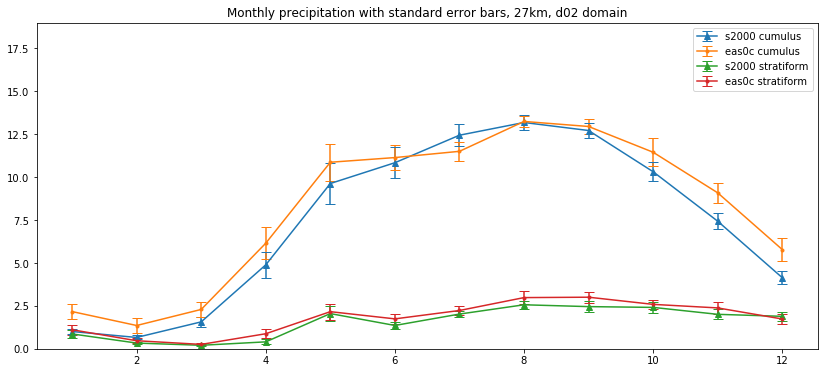

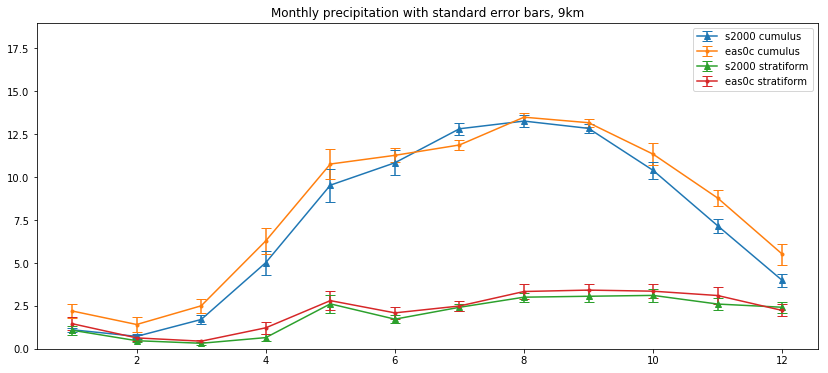

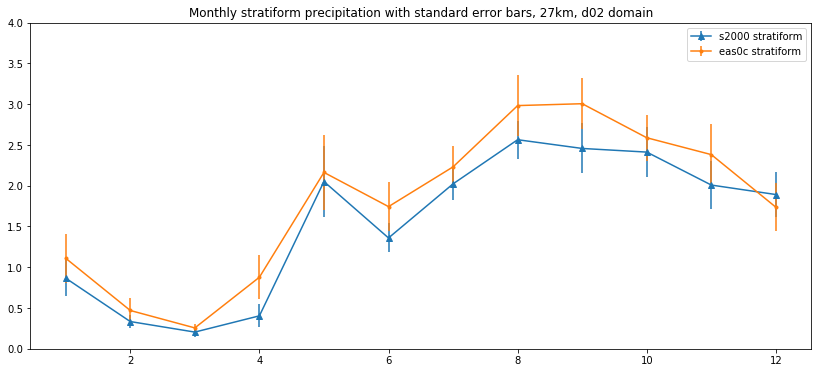

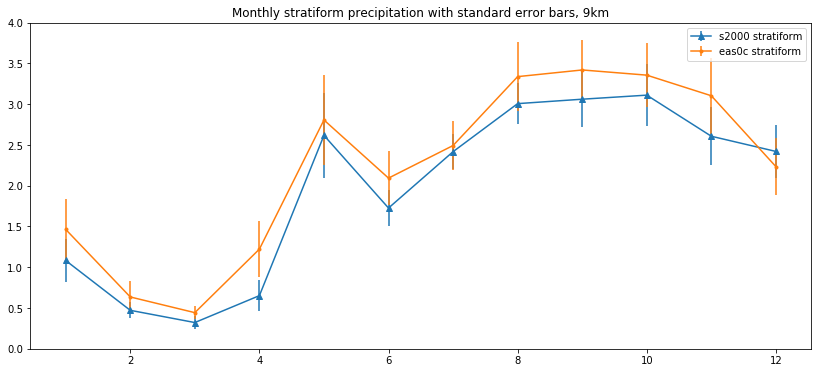

In [142]:
plt.rcParams["figure.figsize"] = 14,6
t=np.arange(1,13)

plt.figure(1)
plt.errorbar(t,s1_ann_d01_cu,s1_ann_d01_cu_sd, marker='^',capsize=5,label='s2000 cumulus')
plt.errorbar(t,s2_ann_d01_cu,s2_ann_d01_cu_sd, marker='.',capsize=5,label='eas0c cumulus')
plt.errorbar(t,s1_ann_d01_cl,s1_ann_d01_cl_sd, marker='^',capsize=5,label='s2000 stratiform')
plt.errorbar(t,s2_ann_d01_cl,s2_ann_d01_cl_sd, marker='.',capsize=5,label='eas0c stratiform')
plt.ylim(0,19)
plt.title('Monthly precipitation with standard error bars, 27km, d02 domain')
plt.legend()

plt.figure(2)
plt.errorbar(t,s1_ann_d02_cu,s1_ann_d02_cu_sd, marker='^',capsize=5,label='s2000 cumulus')
plt.errorbar(t,s2_ann_d02_cu,s2_ann_d02_cu_sd, marker='.',capsize=5,label='eas0c cumulus')
plt.errorbar(t,s1_ann_d02_cl,s1_ann_d02_cl_sd, marker='^',capsize=5,label='s2000 stratiform')
plt.errorbar(t,s2_ann_d02_cl,s2_ann_d02_cl_sd, marker='.',capsize=5,label='eas0c stratiform')
plt.ylim(0,19)
plt.title('Monthly precipitation with standard error bars, 9km')
plt.legend()

plt.figure(3)
plt.errorbar(t,s1_ann_d01_cl,s1_ann_d01_cl_sd, marker='^',label='s2000 stratiform')
plt.errorbar(t,s2_ann_d01_cl,s2_ann_d01_cl_sd, marker='.',label='eas0c stratiform')
plt.ylim(0,4)
plt.title('Monthly stratiform precipitation with standard error bars, 27km, d02 domain')
plt.legend()

plt.figure(4)
plt.errorbar(t,s1_ann_d02_cl,s1_ann_d02_cl_sd, marker='^',label='s2000 stratiform')
plt.errorbar(t,s2_ann_d02_cl,s2_ann_d02_cl_sd, marker='.',label='eas0c stratiform')
plt.ylim(0,4)
plt.title('Monthly stratiform precipitation with standard error bars, 9km')
plt.legend()

plt.show()

In [194]:
#resample to quarterly
def qtr_sam(data):
    time,lat,lon=np.shape(data)
    myperm=list(range(2,180))
    myperm.append(0)
    myperm.append(1)
    return np.mean(np.reshape(data[myperm,:,:],(-1,3,lat,lon)),axis=1)

s1_qtr_d01_cl=qtr_sam(s1_mth_d01_cl.data)
s1_qtr_d01_cu=qtr_sam(s1_mth_d01_cu.data)
s2_qtr_d01_cl=qtr_sam(s2_mth_d01_cl.data)
s2_qtr_d01_cu=qtr_sam(s2_mth_d01_cu.data)

s1_qtr_d02_cl=qtr_sam(s1_mth_d02_cl.data)
s1_qtr_d02_cu=qtr_sam(s1_mth_d02_cu.data)
s2_qtr_d02_cl=qtr_sam(s2_mth_d02_cl.data)
s2_qtr_d02_cu=qtr_sam(s2_mth_d02_cu.data)

print(np.shape(s2_qtr_d02_cu))
#group data
def agg_qtr(ppt_data):
    ti,lat,lon=np.shape(ppt_data)
    return np.mean(np.reshape(ppt_data.data,(-1,4,lat,lon)),axis=(0,2,3))
s1_qtrr_d01_cl=agg_qtr(s1_qtr_d01_cl)
s1_qtrr_d01_cu=agg_qtr(s1_qtr_d01_cu)
s2_qtrr_d01_cl=agg_qtr(s2_qtr_d01_cl)
s2_qtrr_d01_cu=agg_qtr(s2_qtr_d01_cu)

s1_qtrr_d02_cl=agg_qtr(s1_qtr_d02_cl)
s1_qtrr_d02_cu=agg_qtr(s1_qtr_d02_cu)
s2_qtrr_d02_cl=agg_qtr(s2_qtr_d02_cl)
s2_qtrr_d02_cu=agg_qtr(s2_qtr_d02_cu)

print(np.shape(s2_qtr_d02_cu))
def calculate_qsem_d01(ppt_data):
    ti,lat,lon=np.shape(ppt_data)
    return sem(np.mean(np.reshape(ppt_data.data,(-1,4,lat,lon)),axis=(2,3)),axis=0)
def calculate_qsem_d02(ppt_data):
    return sem(np.mean(np.reshape(ppt_data.data,(-1,4,170,173)),axis=(2,3)),axis=0)
s1_qtr_d01_cu_sd=calculate_qsem_d01(s1_qtr_d01_cu)
s1_qtr_d01_cl_sd=calculate_qsem_d01(s1_qtr_d01_cl)
s2_qtr_d01_cu_sd=calculate_qsem_d01(s2_qtr_d01_cu)
s2_qtr_d01_cl_sd=calculate_qsem_d01(s2_qtr_d01_cl)

s1_qtr_d02_cu_sd=calculate_qsem_d02(s1_qtr_d02_cu)
s1_qtr_d02_cl_sd=calculate_qsem_d02(s1_qtr_d02_cl)
s2_qtr_d02_cu_sd=calculate_qsem_d02(s2_qtr_d02_cu)
s2_qtr_d02_cl_sd=calculate_qsem_d02(s2_qtr_d02_cl)

print(np.shape(s2_qtr_d02_cl_sd))
print(np.shape(s2_qtrr_d02_cu))

(60, 170, 173)
(60, 170, 173)
(4,)
(4,)


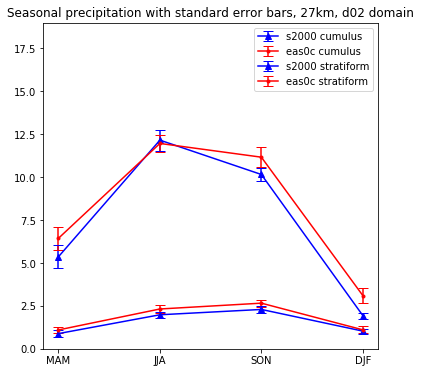

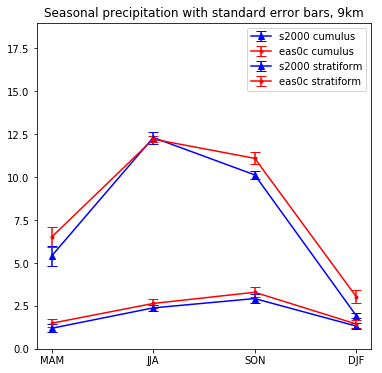

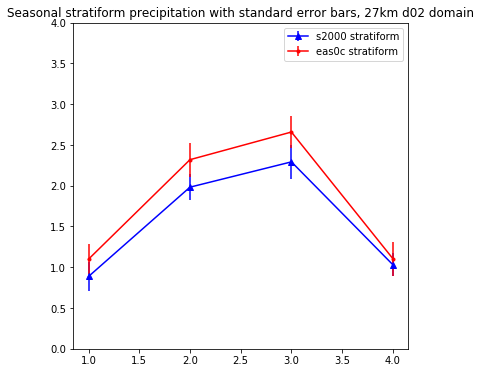

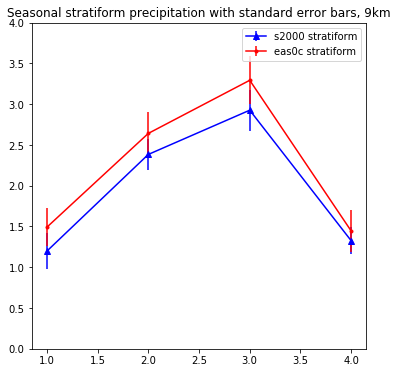

In [6]:
t=np.arange(1,5)
plt.rcParams["figure.figsize"] = 6,6
plt.figure(1)
plt.errorbar(t,s1_qtrr_d01_cu,s1_qtr_d01_cu_sd, marker='^',capsize=5,color='b',label='s2000 cumulus')
plt.errorbar(t,s2_qtrr_d01_cu,s2_qtr_d01_cu_sd, marker='.',capsize=5,color='r',label='eas0c cumulus')
plt.errorbar(t,s1_qtrr_d01_cl,s1_qtr_d01_cl_sd, marker='^',capsize=5,color='b',label='s2000 stratiform')
plt.errorbar(t,s2_qtrr_d01_cl,s2_qtr_d01_cl_sd, marker='.',capsize=5,color='r',label='eas0c stratiform')
plt.ylim(0,19)
my_xticks=['MAM','JJA','SON','DJF']
plt.xticks([1,2,3,4],my_xticks)
plt.title('Seasonal precipitation with standard error bars, 27km, d02 domain')
plt.legend()

plt.figure(2)
plt.errorbar(t,s1_qtrr_d02_cu,s1_qtr_d02_cu_sd, marker='^',capsize=5,color='b',label='s2000 cumulus')
plt.errorbar(t,s2_qtrr_d02_cu,s2_qtr_d02_cu_sd, marker='.',capsize=5,color='r',label='eas0c cumulus')
plt.errorbar(t,s1_qtrr_d02_cl,s1_qtr_d02_cl_sd, marker='^',capsize=5,color='b',label='s2000 stratiform')
plt.errorbar(t,s2_qtrr_d02_cl,s2_qtr_d02_cl_sd, marker='.',capsize=5,color='r',label='eas0c stratiform')
plt.ylim(0,19)
my_xticks=['MAM','JJA','SON','DJF']
plt.xticks([1,2,3,4],my_xticks)
plt.title('Seasonal precipitation with standard error bars, 9km')
plt.legend()

plt.figure(3)
plt.errorbar(t,s1_qtrr_d01_cl,s1_qtr_d01_cl_sd, marker='^',color='b',label='s2000 stratiform')
plt.errorbar(t,s2_qtrr_d01_cl,s2_qtr_d01_cl_sd, marker='.',color='r',label='eas0c stratiform')
plt.ylim(0,4)
plt.title('Seasonal stratiform precipitation with standard error bars, 27km d02 domain')
plt.legend()

plt.figure(4)
plt.errorbar(t,s1_qtrr_d02_cl,s1_qtr_d02_cl_sd, marker='^',color='b',label='s2000 stratiform')
plt.errorbar(t,s2_qtrr_d02_cl,s2_qtr_d02_cl_sd, marker='.',color='r',label='eas0c stratiform')
plt.ylim(0,4)
plt.title('Seasonal stratiform precipitation with standard error bars, 9km')
plt.legend()

plt.show()

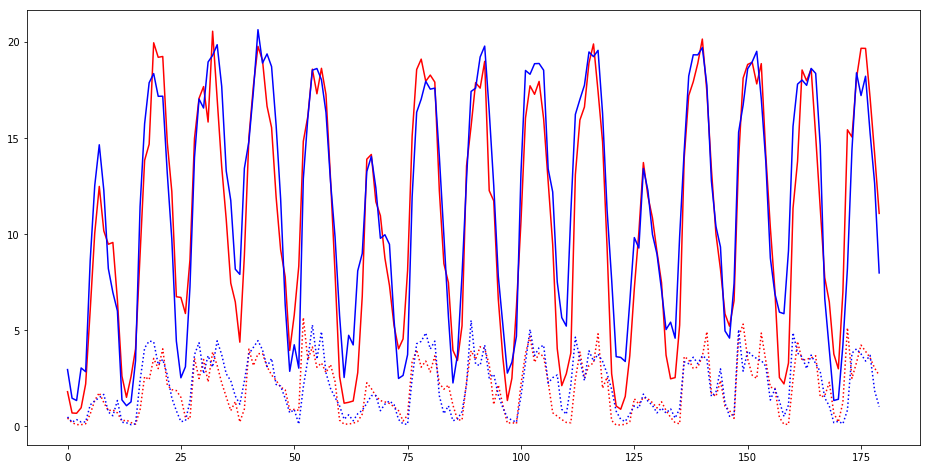

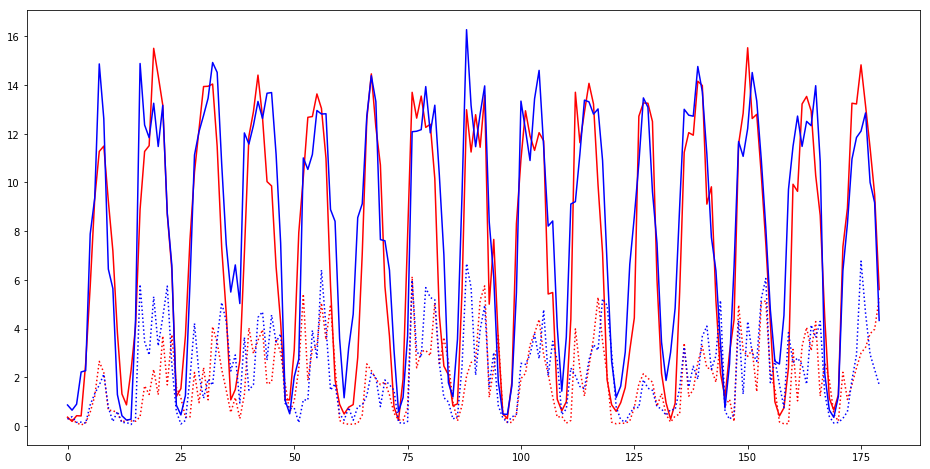

In [99]:
plt.figure(1)
plt.plot(np.mean(s1_mth_d01_cu,axis=(1,2)),'r-')
plt.plot(np.mean(s1_mth_d01_cl,axis=(1,2)),'r:')
plt.plot(np.mean(s2_mth_d01_cu,axis=(1,2)),'b-')
plt.plot(np.mean(s2_mth_d01_cl,axis=(1,2)),'b:')
plt.show()

plt.figure(2)
plt.plot(np.mean(s1_mth_d02_cu,axis=(1,2)),'r-')
plt.plot(np.mean(s1_mth_d02_cl,axis=(1,2)),'r:')
plt.plot(np.mean(s2_mth_d02_cu,axis=(1,2)),'b-')
plt.plot(np.mean(s2_mth_d02_cl,axis=(1,2)),'b:')
plt.show()

(12, 11, 17)
(12, 11)
(12, 11)
(12, 11)
(12, 11)
(12, 11)
(12, 11)
(12, 11)
(12, 11)
(12, 11)


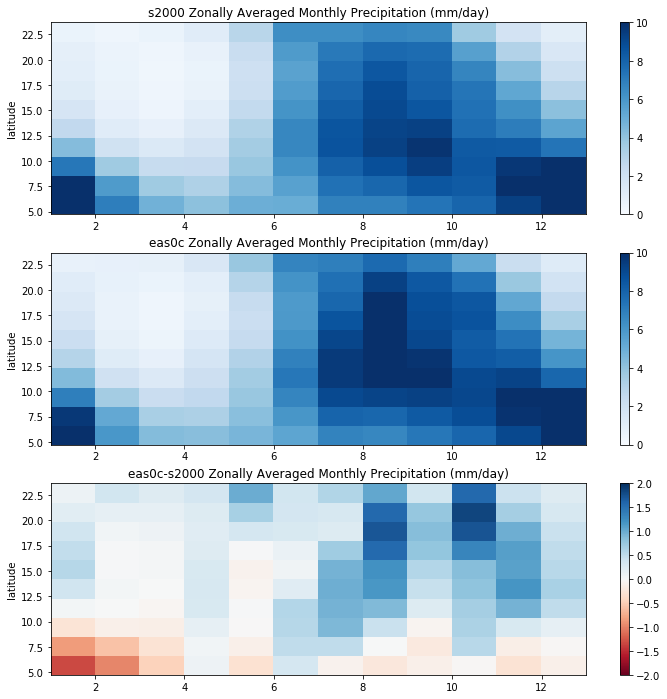

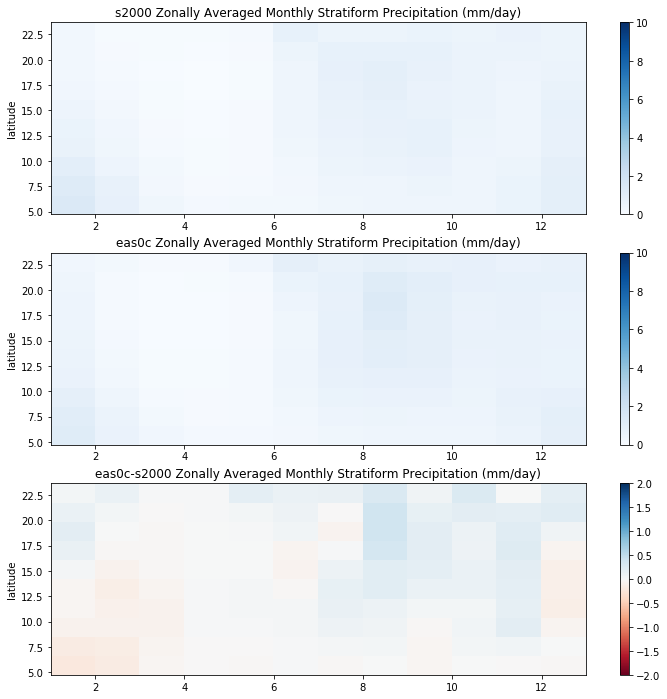

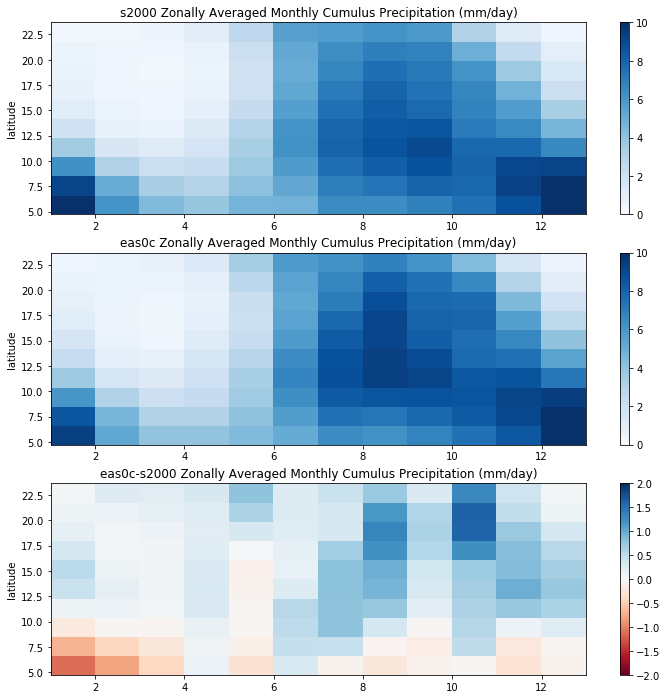

In [77]:

# cesmcl2000 = reshape_time(pptcl2k.PRECL)*units
# cesmcu2000 = reshape_time(pptcu2k.PRECC)*units
# cesmcleas0c = reshape_time(pptcleas0.PRECL)*units
# cesmcueas0c = reshape_time(pptcueas0.PRECC)*units

np.shape(cesmcl2000)
cesmcl2000_mth=cesmcl2000.groupby('time.month').mean(axis=0)
cesmcu2000_mth=cesmcu2000.groupby('time.month').mean(axis=0)
cesmcleas0c_mth=cesmcleas0c.groupby('time.month').mean(axis=0)
cesmcueas0c_mth=cesmcueas0c.groupby('time.month').mean(axis=0)
ppt2000_mth=cesmcl2000_mth+cesmcu2000_mth
ppteas0c_mth=cesmcleas0c_mth+cesmcueas0c_mth
print(np.shape(ppt2000_mth))

plt.rcParams["figure.figsize"] = 12,12
lats_mth=np.mean(ppt2000_mth,axis=2)
print(np.shape(lats_mth))
plt.figure(1)
plt.subplot(3,1,1)
plt.pcolormesh(np.arange(1,14),lats.data,lats_mth.T,vmin=0,vmax=10,cmap='Blues')
plt.ylabel('latitude')
plt.title('s2000 Zonally Averaged Monthly Precipitation (mm/day)')
# plt.xticks(time_val2,my_xticks)
plt.colorbar()

lats_mth=np.mean(ppteas0c_mth,axis=2)
print(np.shape(lats_mth))
plt.subplot(3,1,2)
plt.pcolormesh(np.arange(1,14),lats.data,lats_mth.T,vmin=0,vmax=10,cmap='Blues')
plt.ylabel('latitude')
plt.title('eas0c Zonally Averaged Monthly Precipitation (mm/day)')
# plt.xticks(time_val2,my_xticks)
plt.colorbar()

lats_mth=np.mean(ppteas0c_mth-ppt2000_mth,axis=2)
print(np.shape(lats_mth))
plt.subplot(3,1,3)
plt.pcolormesh(np.arange(1,14),lats.data,lats_mth.T,vmin=-2,vmax=2,cmap='RdBu')
plt.ylabel('latitude')
plt.title('eas0c-s2000 Zonally Averaged Monthly Precipitation (mm/day)')
# plt.xticks(time_val2,my_xticks)
plt.colorbar()

lats_mth=np.mean(cesmcl2000_mth,axis=2)
print(np.shape(lats_mth))
plt.figure(2)
plt.subplot(3,1,1)
plt.pcolormesh(np.arange(1,14),lats.data,lats_mth.T,vmin=0,vmax=10,cmap='Blues')
plt.ylabel('latitude')
plt.title('s2000 Zonally Averaged Monthly Stratiform Precipitation (mm/day)')
# plt.xticks(time_val2,my_xticks)
plt.colorbar()

lats_mth=np.mean(cesmcleas0c_mth,axis=2)
print(np.shape(lats_mth))
plt.subplot(3,1,2)
plt.pcolormesh(np.arange(1,14),lats.data,lats_mth.T,vmin=0,vmax=10,cmap='Blues')
plt.ylabel('latitude')
plt.title('eas0c Zonally Averaged Monthly Stratiform Precipitation (mm/day)')
# plt.xticks(time_val2,my_xticks)
plt.colorbar()


lats_mth=np.mean(cesmcleas0c_mth-cesmcl2000_mth,axis=2)
print(np.shape(lats_mth))
plt.subplot(3,1,3)
plt.pcolormesh(np.arange(1,14),lats.data,lats_mth.T,vmin=-2,vmax=2,cmap='RdBu')
plt.ylabel('latitude')
plt.title('eas0c-s2000 Zonally Averaged Monthly Stratiform Precipitation (mm/day)')
# plt.xticks(time_val2,my_xticks)
plt.colorbar()

lats_mth=np.mean(cesmcu2000_mth,axis=2)
print(np.shape(lats_mth))
plt.figure(3)
plt.subplot(3,1,1)
plt.pcolormesh(np.arange(1,14),lats.data,lats_mth.T,vmin=0,vmax=10,cmap='Blues')
plt.ylabel('latitude')
plt.title('s2000 Zonally Averaged Monthly Cumulus Precipitation (mm/day)')
# plt.xticks(time_val2,my_xticks)
plt.colorbar()

lats_mth=np.mean(cesmcueas0c_mth,axis=2)
print(np.shape(lats_mth))
plt.subplot(3,1,2)
plt.pcolormesh(np.arange(1,14),lats.data,lats_mth.T,vmin=0,vmax=10,cmap='Blues')
plt.ylabel('latitude')
plt.title('eas0c Zonally Averaged Monthly Cumulus Precipitation (mm/day)')
# plt.xticks(time_val2,my_xticks)
plt.colorbar()


lats_mth=np.mean(cesmcueas0c_mth-cesmcu2000_mth,axis=2)
print(np.shape(lats_mth))
plt.subplot(3,1,3)
plt.pcolormesh(np.arange(1,14),lats.data,lats_mth.T,vmin=-2,vmax=2,cmap='RdBu')
plt.ylabel('latitude')
plt.title('eas0c-s2000 Zonally Averaged Monthly Cumulus Precipitation (mm/day)')
# plt.xticks(time_val2,my_xticks)
plt.colorbar()

plt.show()

## PDF plots ##

In [227]:
from scipy.stats import norm
import scipy
import matplotlib.mlab as mlab
print(np.shape(s1raw_d01.PPT))
plt.rcParams["figure.figsize"] = 10,6

def plot_pdf(x,label,ax):
    num_bins = 100
    # the histogram of the data
    # n, bins, patches = ax.hist(x, num_bins, normed=1)
    # add a 'best fit' line
    kde=scipy.stats.gaussian_kde(x.data)
    t_range = np.linspace(min(x.data),max(x.data),num_bins)
    ax.plot(t_range,kde(t_range),label=label)
    ax.legend()

print(np.shape(s2_mth_d01_ppt))

(5475, 89, 170)
(180, 89, 170)


### Plot PDF for whole year

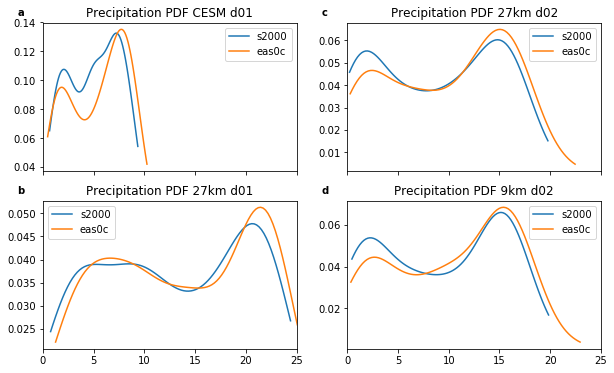

In [187]:
plt.figure(1)
fig, ax = plt.subplots(2,2,sharex=True)
ax[0,0].set_title('Precipitation PDF CESM d01')
plot_pdf(np.mean(cesmcu2000+cesmcl2000,axis=(1,2)),'s2000',ax[0,0])
plot_pdf(np.mean(cesmcueas0c+cesmcleas0c,axis=(1,2)),'eas0c',ax[0,0])
plt.xlim( (0, 25) )
ax[0,0].text(-0.1, 1.05, 'a', transform=ax[0,0].transAxes, 
            size=10, weight='bold')
# plt.legend()

# plt.figure(2)
# fig, ax = plt.subplots(3,1,2)
ax[1,0].set_title('Precipitation PDF 27km d01')
x=np.mean(s1_mth_d01_ppt,axis=(1,2))
plot_pdf(x,'s2000',ax[1,0])
x2=np.mean(s2_mth_d01_ppt,axis=(1,2))
plot_pdf(x2,'eas0c',ax[1,0])
ax[1,0].text(-0.1, 1.05, 'b', transform=ax[1,0].transAxes, 
            size=10, weight='bold')
# plt.xlim( (0, 40) )
# plt.legend()

#d02
latmin=6.74
latmax=20.40
lonmin=95.74
lonmax=110.08
ax[0,1].set_title('Precipitation PDF 27km d02')
x=np.mean(s1_mth_d01_ppt.sel(lat=slice(latmin, latmax),lon=slice(lonmin,lonmax)),axis=(1,2))
plot_pdf(x,'s2000',ax[0,1])
x2=np.mean(s2_mth_d01_ppt.sel(lat=slice(latmin, latmax),lon=slice(lonmin,lonmax)),axis=(1,2))
plot_pdf(x2,'eas0c',ax[0,1])
ax[0,1].text(-0.1, 1.05, 'c', transform=ax[0,1].transAxes, 
            size=10, weight='bold')

# plt.figure(3)
# fig, ax = plt.subplots(3,1,3)
ax[1,1].set_title('Precipitation PDF 9km d02')
plot_pdf(np.mean(s1_mth_d02_ppt,axis=(1,2)),'s2000',ax[1,1])
plot_pdf(np.mean(s2_mth_d02_ppt,axis=(1,2)),'eas0c',ax[1,1])
ax[1,1].text(-0.1, 1.05, 'd', transform=ax[1,1].transAxes, 
            size=10, weight='bold')
# plt.xlim( (0, 40) )
# plt.legend()

plt.show()

### Plot PDF for seasonal

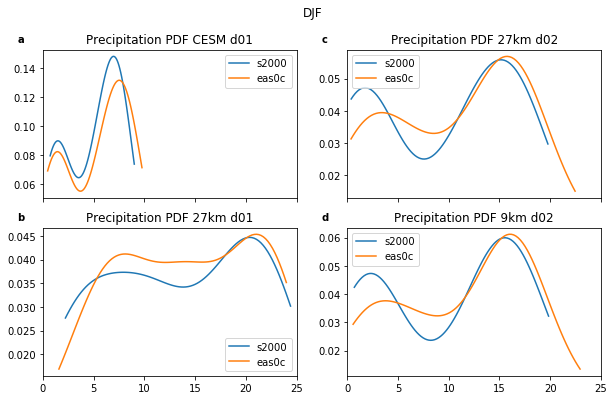

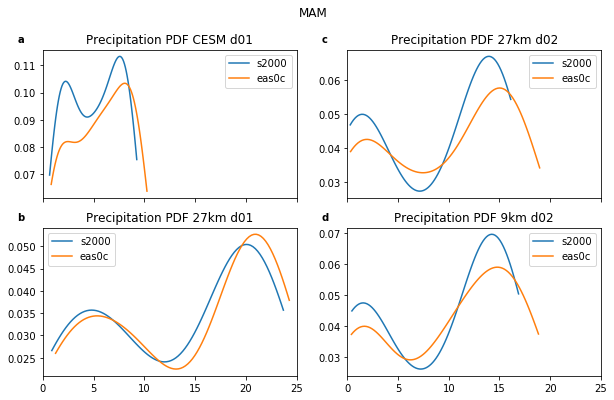

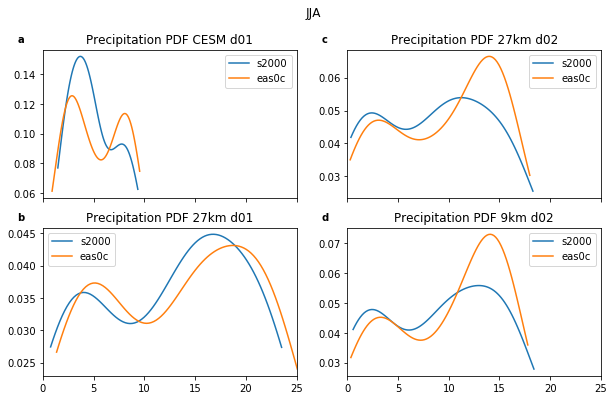

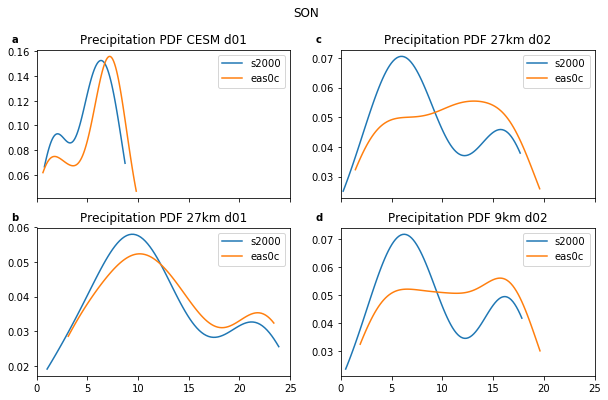

In [228]:
def agg_qtr_raw(ppt_data):
    ti,lat,lon=np.shape(ppt_data)
    return np.reshape(ppt_data.data,(-1,4,lat,lon))

def plt_qtr_pdf(qtr):
    fig, ax = plt.subplots(2,2,sharex=True)
    ax[0,0].set_title('Precipitation PDF CESM d01')
    plot_pdf(np.mean(s1_qtr[:,qtr,:,:],axis=(1,2)),'s2000',ax[0,0])
    plot_pdf(np.mean(s2_qtr[:,qtr,:,:],axis=(1,2)),'eas0c',ax[0,0])
    plt.xlim( (0, 25) )
    ax[0,0].text(-0.1, 1.05, 'a', transform=ax[0,0].transAxes, 
                size=10, weight='bold')

    ax[1,0].set_title('Precipitation PDF 27km d01')
    x=np.mean(agg_qtr_raw(s1_mth_d01_ppt)[:,qtr,:,:],axis=(1,2))
    plot_pdf(x,'s2000',ax[1,0])
    x2=np.mean(agg_qtr_raw(s2_mth_d01_ppt)[:,qtr,:,:],axis=(1,2))
    plot_pdf(x2,'eas0c',ax[1,0])
    ax[1,0].text(-0.1, 1.05, 'b', transform=ax[1,0].transAxes, 
                size=10, weight='bold')

    ax[0,1].set_title('Precipitation PDF 27km d02')
    x=np.mean(agg_qtr_raw(s1_mth_d01_ppt.sel(lat=slice(latmin, latmax),lon=slice(lonmin,lonmax)))[:,qtr,:,:],axis=(1,2))
    plot_pdf(x,'s2000',ax[0,1])
    x2=np.mean(agg_qtr_raw(s2_mth_d01_ppt.sel(lat=slice(latmin, latmax),lon=slice(lonmin,lonmax)))[:,qtr,:,:],axis=(1,2))
    plot_pdf(x2,'eas0c',ax[0,1])
    ax[0,1].text(-0.1, 1.05, 'c', transform=ax[0,1].transAxes, 
                size=10, weight='bold')

    ax[1,1].set_title('Precipitation PDF 9km d02')
    plot_pdf(np.mean(agg_qtr_raw(s1_mth_d02_ppt)[:,qtr,:,:],axis=(1,2)),'s2000',ax[1,1])
    plot_pdf(np.mean(agg_qtr_raw(s2_mth_d02_ppt)[:,qtr,:,:],axis=(1,2)),'eas0c',ax[1,1])
    ax[1,1].text(-0.1, 1.05, 'd', transform=ax[1,1].transAxes, 
                size=10, weight='bold')


for i in range(1,5):
    plt.figure(i)
    plt_qtr_pdf(i-1)
    plt.suptitle(quarters[i])

    
plt.show()

In [208]:
np.shape(s1_mth_d01_ppt)

(180, 89, 170)